<a href="https://colab.research.google.com/github/RohanCheera/Sentiment-Analysis/blob/main/Analyzing_Tinder_Reviews_with_Python_Unveiling_User_Sentiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Tinder Reviews with Python: Unveiling User Sentiments**

Tinder, renowned as one of the leading dating applications, has revolutionized the way people connect, bringing together individuals with shared interests. A pertinent question often arises: Does Tinder genuinely facilitate finding romantic partners? To answer this query, we can explore the sentiments expressed by Tinder users. The Google Play Store is replete with an abundance of Tinder reviews, offering a wealth of data to gauge user sentiments. If you're keen on discovering how to analyze Tinder reviews, this article is tailored for you. In this article, we will embark on a journey to perform sentiment analysis on Tinder reviews using Python.

**Tinder Reviews Sentiment Analysis using Python:**

To begin this sentiment analysis task, we need a dataset containing Tinder reviews. We have obtained our dataset from Kaggle. Let's kickstart this analysis by importing essential Python libraries and loading the dataset:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("/content/tinder_google_play_reviews.csv")
print(data.head())


                               reviewId         userName  \
0  f2c8c2bc-4682-4ace-8750-1f264db73458     Daniel Avila   
1  89bd41d8-0a2e-4cf6-bff9-e5a8f03a439b    Dillon Dupuis   
2  a29faa01-36f9-40f1-9a7f-b7240588bf74        Anthea Wu   
3  11567dd5-2162-4f20-ae36-6653af097a1d         Andrew S   
4  29880995-4bc8-43e3-8ade-db3735ff70e0  Mohamed monster   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0  Once you mess up the algorithm you have to pay...    1.0            2.0   
1                                               good    5.0            0.0   
2  If I can give zero stars I'll give zero stars....    1.0         

**Data Overview:**

Upon initial inspection, we notice that there are null values in some columns. To analyze Tinder reviews, we primarily require the "content" column. Let's create a new dataset with only the "content" column:


In [ ]:
data = data[["content"]]


Now, let's address potential null values in the "content" column:

In [ ]:
data.isnull().sum()


content    4
dtype: int64

Given that there are null values in the "content" column, let's proceed by removing them:

In [ ]:
data = data.dropna()


**Data Preprocessing:**

To prepare the data for sentiment analysis, we need to clean the text within the "content" column:

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["content"] = data["content"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Word Cloud Analysis:**

Let's visualize the most frequently used words in the reviews using a word cloud:

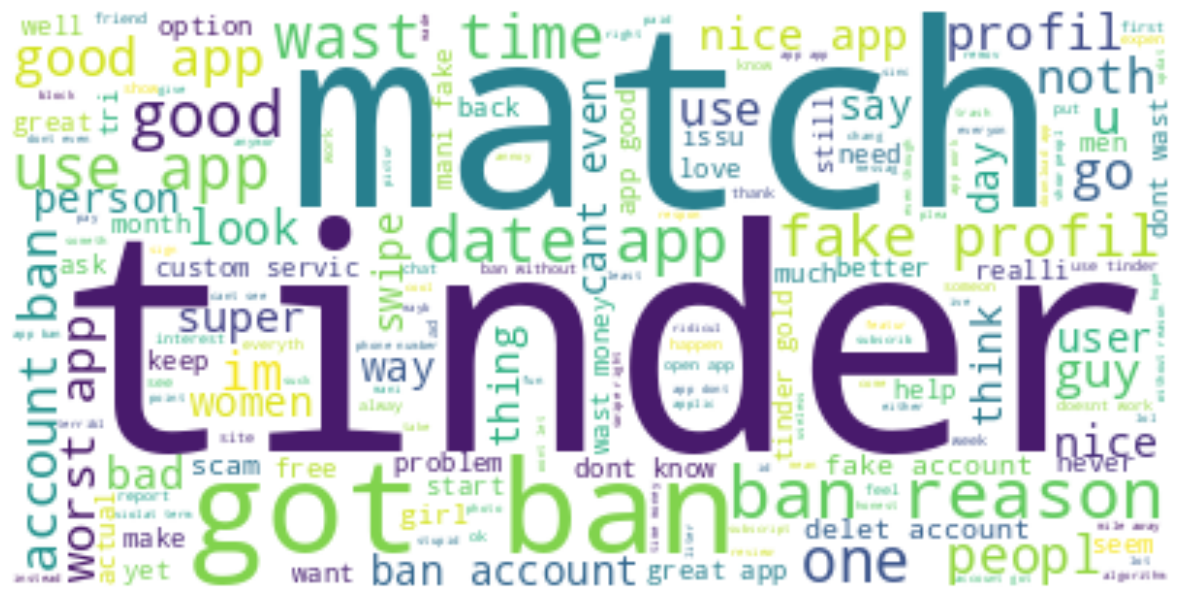

In [ ]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Sentiment Analysis:**

Now, we'll add three additional columns to the dataset to represent Positive, Negative, and Neutral sentiments. We'll calculate these sentiment scores for each review:



In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                             content  Positive  Negative  \
0  mess algorithm pay order get notic big wast ti...     0.144     0.186   
1                                               good     1.000     0.000   
2  give zero star ill give zero star much patriar...     0.084     0.123   
3                        garbag tri real life honest     0.452     0.000   
4                                 got ban share ig 😒     0.282     0.462   

   Neutral  
0    0.669  
1    0.000  
2    0.793  
3    0.548  
4    0.256  


**Word Clouds for Positive and Negative Reviews:**

To delve deeper, let's visualize the words used in positive and negative reviews separately.

For positive reviews:

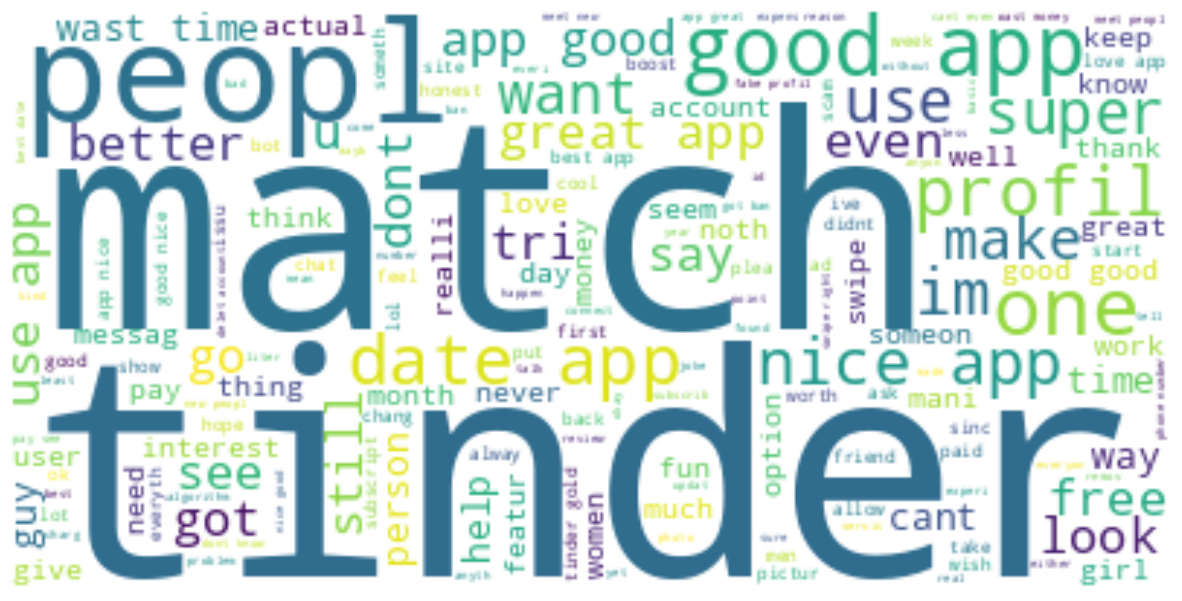

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**For negative reviews:**

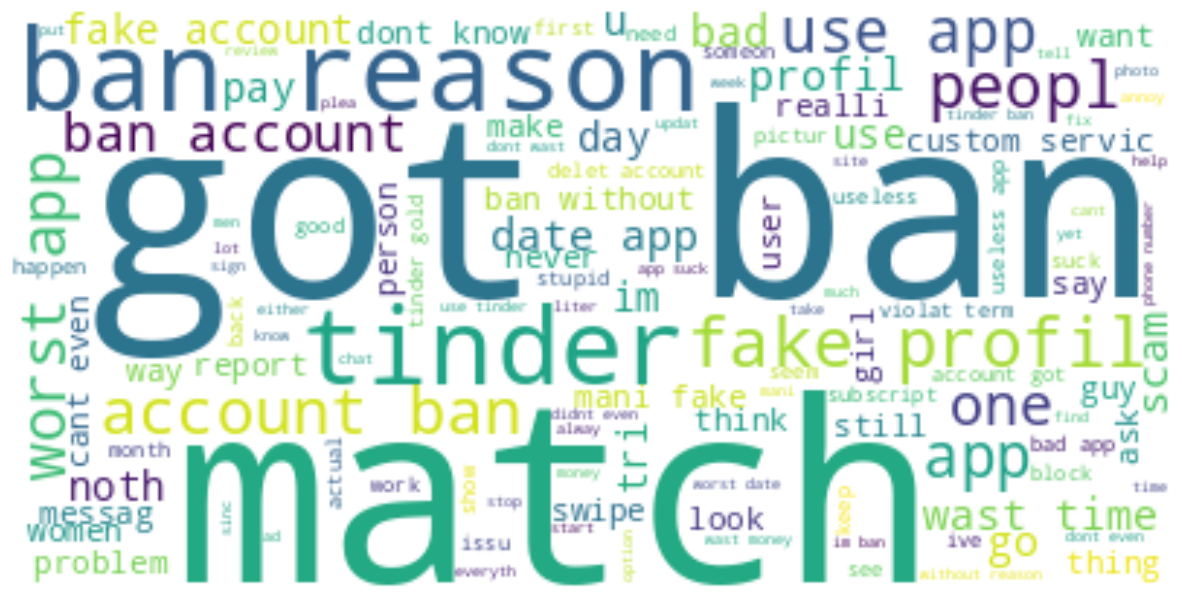

In [ ]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


**Overall Sentiment Analysis:**

Let's assess the overall sentiment scores of Tinder users:

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        print("Positive 😊 ")
    elif (b > a) and (b > c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")

sentiment_score(x, y, z)

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


Neutral 🙂 
Positive:  35969.45099999749
Negative:  22871.901999999784
Neutral:  87662.70700000657
